In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Загрузка данных в переменную

In [2]:
data = pd.read_csv('/content/exams.csv')

## 2. Описание и постановка задачи.

Исходя из представленых колонок, можно сделать вывод о том, что идеальной задачей для такого датасета является регрессия. В таком случае целевой переменной следует выбрать math score.

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## 3. Предобработка данных

Проверяем пропуски, делим выборки, используем трансформатор, карбюратор, инжектор...

In [4]:
missing_values = data.isnull().sum()
missing_values1 = data.isna().sum()
print("Количество пропусков в каждой колонке: ")
print(missing_values, "\n")
print("#######################################", "\n")
print(missing_values1)
print("#######################################", "\n")
data.applymap(lambda x: x is None)

Количество пропусков в каждой колонке: 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64 

####################################### 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
####################################### 



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [5]:
X = data.drop('math score', axis=1)
y = data['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер тренировочной выборки: (700, 7)
Размер тестовой выборки: (300, 7)


Жестко кодируем/нормируем

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [7]:
numeric_preds = ['reading score', 'writing score']
categorial_preds = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_preds),
        ('cat', categorical_transformer, categorial_preds)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Размер предобработанной тренировочной выборки:", X_train_processed.shape)
print("Размер предобработанной тестовой выборки:", X_test_processed.shape)

Размер предобработанной тренировочной выборки: (700, 19)
Размер предобработанной тестовой выборки: (300, 19)


In [12]:
scaler = StandardScaler()

y_train_preprocessed = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_preprocessed = scaler.transform(y_test.values.reshape(-1, 1))

## 4. Оформление в виде класса Dataset

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [15]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train_processed, y_train_preprocessed)
test_dataset = CustomDataset(X_test_processed, y_test_preprocessed)

batch_size = 32
shuffle = True

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for X_batch, y_batch in train_loader:
    print("Размер батча X:", X_batch.size())
    print("Размер батча y:", y_batch.size())
    break

Размер батча X: torch.Size([32, 19])
Размер батча y: torch.Size([32, 1])


## Тренировка моделей

### однослойная нейронка с **SGD**

In [ ]:
!pip install torchmetrics

Epoch [1/100], Train Loss: 0.6197
Epoch [2/100], Train Loss: 0.3644
Epoch [3/100], Train Loss: 0.2800
Epoch [4/100], Train Loss: 0.2350
Epoch [5/100], Train Loss: 0.2061
Epoch [6/100], Train Loss: 0.1864
Epoch [7/100], Train Loss: 0.1726
Epoch [8/100], Train Loss: 0.1627
Epoch [9/100], Train Loss: 0.1558
Epoch [10/100], Train Loss: 0.1508
Epoch [11/100], Train Loss: 0.1472
Epoch [12/100], Train Loss: 0.1441
Epoch [13/100], Train Loss: 0.1419
Epoch [14/100], Train Loss: 0.1404
Epoch [15/100], Train Loss: 0.1387
Epoch [16/100], Train Loss: 0.1380
Epoch [17/100], Train Loss: 0.1371
Epoch [18/100], Train Loss: 0.1364
Epoch [19/100], Train Loss: 0.1355
Epoch [20/100], Train Loss: 0.1350
Epoch [21/100], Train Loss: 0.1345
Epoch [22/100], Train Loss: 0.1341
Epoch [23/100], Train Loss: 0.1338
Epoch [24/100], Train Loss: 0.1335
Epoch [25/100], Train Loss: 0.1332
Epoch [26/100], Train Loss: 0.1329
Epoch [27/100], Train Loss: 0.1327
Epoch [28/100], Train Loss: 0.1323
Epoch [29/100], Train Loss: 0

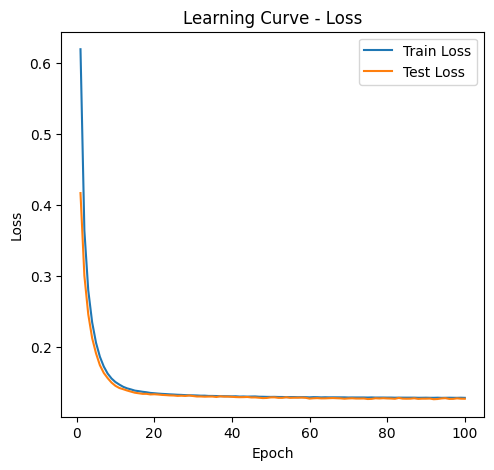

Final Train MAE: 0.2872
Final Test MAE: 0.2937


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import MeanAbsoluteError
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x)

input_dim = X_train_processed.shape[1]
model_simple = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model_simple.parameters(), lr=0.01)

num_epochs = 100
train_losses = []
test_losses = []

model_simple.train()
for epoch in range(num_epochs):
    model_simple.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_simple(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model_simple.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_simple(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)

    epoch_test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve - Loss')

plt.show()


mae_metric = MeanAbsoluteError()

model_simple.eval()
train_mae = 0.0
with torch.no_grad():
    for X_batch, y_batch in train_loader:
        outputs = model_simple(X_batch)
        train_mae += mae_metric(outputs, y_batch).item() * X_batch.size(0)
final_train_mae = train_mae / len(train_loader.dataset)

test_mae = 0.0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_simple(X_batch)
        test_mae += mae_metric(outputs, y_batch).item() * X_batch.size(0)
final_test_mae = test_mae / len(test_loader.dataset)

print(f'Final Train MAE: {final_train_mae:.4f}')
print(f'Final Test MAE: {final_test_mae:.4f}')

### нейронка с одним скрытым слоем и оптимизатором **Adam**

Epoch [1/100], Train Loss: 0.9372, Test Loss: 0.6958
Epoch [2/100], Train Loss: 0.6100, Test Loss: 0.4415
Epoch [3/100], Train Loss: 0.3738, Test Loss: 0.2604
Epoch [4/100], Train Loss: 0.2228, Test Loss: 0.1759
Epoch [5/100], Train Loss: 0.1614, Test Loss: 0.1466
Epoch [6/100], Train Loss: 0.1411, Test Loss: 0.1376
Epoch [7/100], Train Loss: 0.1353, Test Loss: 0.1376
Epoch [8/100], Train Loss: 0.1336, Test Loss: 0.1391
Epoch [9/100], Train Loss: 0.1327, Test Loss: 0.1372
Epoch [10/100], Train Loss: 0.1318, Test Loss: 0.1393
Epoch [11/100], Train Loss: 0.1302, Test Loss: 0.1364
Epoch [12/100], Train Loss: 0.1295, Test Loss: 0.1388
Epoch [13/100], Train Loss: 0.1291, Test Loss: 0.1357
Epoch [14/100], Train Loss: 0.1278, Test Loss: 0.1358
Epoch [15/100], Train Loss: 0.1278, Test Loss: 0.1378
Epoch [16/100], Train Loss: 0.1262, Test Loss: 0.1344
Epoch [17/100], Train Loss: 0.1260, Test Loss: 0.1392
Epoch [18/100], Train Loss: 0.1255, Test Loss: 0.1342
Epoch [19/100], Train Loss: 0.1241, T

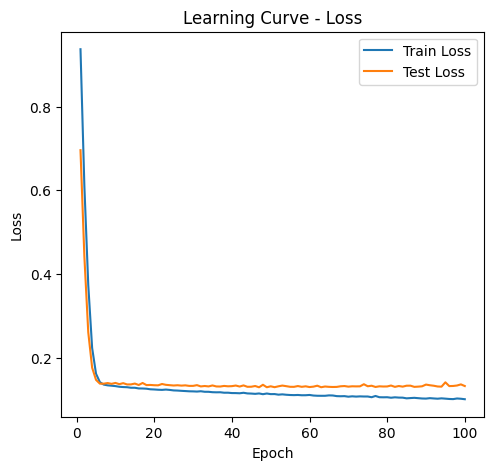

Final Train MAE: 0.2501
Final Test MAE: 0.2995


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import MeanAbsoluteError
import matplotlib.pyplot as plt

class SimpleNNWithHiddenLayer(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SimpleNNWithHiddenLayer, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_dim = X_train_processed.shape[1]
hidden_dim = 64
model_hidden = SimpleNNWithHiddenLayer(input_dim, hidden_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_hidden.parameters(), lr=0.001)

num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model_hidden.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_hidden(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model_hidden.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_hidden(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)

    epoch_test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve - Loss')

plt.show()

mae_metric = MeanAbsoluteError()

model_hidden.eval()
train_mae = 0.0
with torch.no_grad():
    for X_batch, y_batch in train_loader:
        outputs = model_hidden(X_batch)
        train_mae += mae_metric(outputs, y_batch).item() * X_batch.size(0)
final_train_mae = train_mae / len(train_loader.dataset)

test_mae = 0.0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_hidden(X_batch)
        test_mae += mae_metric(outputs, y_batch).item() * X_batch.size(0)
final_test_mae = test_mae / len(test_loader.dataset)

print(f'Final Train MAE: {final_train_mae:.4f}')
print(f'Final Test MAE: {final_test_mae:.4f}')

нейронка с 3+ скрытыми слоями и оптимизатором Adam

Epoch [1/100], Train Loss: 0.9742, Test Loss: 0.8243
Epoch [2/100], Train Loss: 0.6502, Test Loss: 0.3609
Epoch [3/100], Train Loss: 0.2538, Test Loss: 0.1835
Epoch [4/100], Train Loss: 0.1530, Test Loss: 0.1434
Epoch [5/100], Train Loss: 0.1347, Test Loss: 0.1371
Epoch [6/100], Train Loss: 0.1361, Test Loss: 0.1372
Epoch [7/100], Train Loss: 0.1318, Test Loss: 0.1427
Epoch [8/100], Train Loss: 0.1291, Test Loss: 0.1320
Epoch [9/100], Train Loss: 0.1254, Test Loss: 0.1309
Epoch [10/100], Train Loss: 0.1287, Test Loss: 0.1323
Epoch [11/100], Train Loss: 0.1277, Test Loss: 0.1307
Epoch [12/100], Train Loss: 0.1240, Test Loss: 0.1327
Epoch [13/100], Train Loss: 0.1239, Test Loss: 0.1368
Epoch [14/100], Train Loss: 0.1239, Test Loss: 0.1308
Epoch [15/100], Train Loss: 0.1217, Test Loss: 0.1317
Epoch [16/100], Train Loss: 0.1235, Test Loss: 0.1394
Epoch [17/100], Train Loss: 0.1233, Test Loss: 0.1484
Epoch [18/100], Train Loss: 0.1202, Test Loss: 0.1296
Epoch [19/100], Train Loss: 0.1184, T

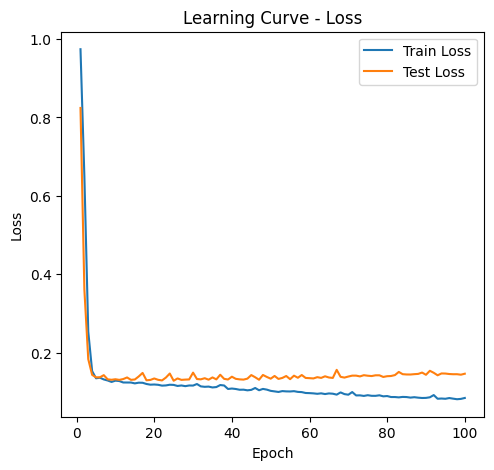

Final Train MAE: 0.2136
Final Test MAE: 0.3140


In [28]:
class LotsOfHidden(nn.Module):
    def __init__(self, input_dim, hidden_dims):
        super(LotsOfHidden, self).__init__()
        layers = []
        prev_dim = input_dim
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        layers.append(nn.Linear(prev_dim, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

input_dim = X_train_processed.shape[1]
hidden_dims = [64, 32, 16]
model_complex = LotsOfHidden(input_dim, hidden_dims)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_complex.parameters(), lr=0.001)

num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model_complex.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_complex(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model_complex.eval()
    running_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model_complex(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)

    epoch_test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve - Loss')

plt.show()

mae_metric = MeanAbsoluteError()

model_complex.eval()
train_mae = 0.0
with torch.no_grad():
    for X_batch, y_batch in train_loader:
        outputs = model_complex(X_batch)
        train_mae += mae_metric(outputs, y_batch).item() * X_batch.size(0)
final_train_mae = train_mae / len(train_loader.dataset)

test_mae = 0.0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_complex(X_batch)
        test_mae += mae_metric(outputs, y_batch).item() * X_batch.size(0)
final_test_mae = test_mae / len(test_loader.dataset)

print(f'Final Train MAE: {final_train_mae:.4f}')
print(f'Final Test MAE: {final_test_mae:.4f}')